In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import plotly 
import plotly.plotly as py 
import plotly.figure_factory as ff
from plotly.graph_objs import *
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import cufflinks as cf
plotly.tools.set_credentials_file(username='bkeljaba', api_key='jIBy5jbNKdIUxlbVK2Kd')

### Read the food deficit data set with pandas
The food deficit is "how many calories would be needed to lift the undernourished from their status, everything else being constant. The average intensity of food deprivation of the undernourished, estimated as the difference between the average dietary energy requirement and the average dietary energy consumption of the undernourished population (food-deprived), is multiplied by the number of undernourished to provide an estimate of the total food deficit in the country, which is then normalized by the total population"("Depth")
https://www.indexmundi.com/facts/indicators/SN.ITK.DFCT

In [2]:
foodDeficit = pd.read_csv("../data/depth_of_the_food_deficit/food_deficit.csv", sep='\t', engine='python', encoding ='latin1')                 
foodDeficit.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,201.0,184.0,168.0,158.0,151.0,149.0,151.0,158.0,166.0,173.0
2,Angola,AGO,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,209.0,189.0,168.0,149.0,132.0,120.0,111.0,104.0,96.0,90.0
3,Albania,ALB,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
refugee = pd.read_csv("../data/ref_by_c_orig/ref_by_c_orig.csv", engine='python', encoding ='latin1')
refugee.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,2833128.0,2887123.0,3054709.0,2664436.0,2586152.0,2556502.0,2596270.0,2666305.0,2501410.0,NaN
2,Angola,AGO,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,171393.0,141021.0,134858.0,128664.0,19258.0,10286.0,9484.0,11869.0,8363.0,NaN
3,Albania,ALB,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,15006.0,15711.0,14772.0,13551.0,12568.0,10103.0,10158.0,10408.0,11050.0,NaN
4,Andorra,AND,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,6.0,6.0,7.0,5.0,7.0,5.0,NaN,NaN


## Clean the food deficit data set with pandas
1. Any row that is completely empty is dropped
2. Any column that is empty is dropped
3. The Indicator Code column is dropped because it is not needed

In [4]:
def cleanDataSets(df):
    # dropping empty rows 
    df2=df.dropna(subset=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002',
                 '2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'], 
                  how='all')
    # dropping empty columns 
    df3=df2.dropna(axis=1, how='all')
    df4=df3.drop('Indicator Code',axis=1)
    df5=df4.drop('Indicator Name',axis=1)
    return df5

In [5]:
filteredFoodDeficit = cleanDataSets(foodDeficit)
filteredRefugee = cleanDataSets(refugee)
filteredRefugee.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Afghanistan,AFG,6339095.0,6306301.0,4552153.0,3374576.0,2731169.0,2679133.0,2674236.0,2676674.0,...,3057661.0,2833128.0,2887123.0,3054709.0,2664436.0,2586152.0,2556502.0,2596270.0,2666305.0,2501410.0
2,Angola,AGO,407760.0,381636.0,300492.0,323831.0,282577.0,246657.0,249687.0,267696.0,...,186155.0,171393.0,141021.0,134858.0,128664.0,19258.0,10286.0,9484.0,11869.0,8363.0
3,Albania,ALB,1822.0,3540.0,4353.0,4744.0,5019.0,5803.0,5785.0,5379.0,...,15340.0,15006.0,15711.0,14772.0,13551.0,12568.0,10103.0,10158.0,10408.0,11050.0
4,Andorra,AND,NaN,NaN,NaN,NaN,2.0,2.0,3.0,1.0,...,9.0,6.0,6.0,6.0,6.0,7.0,5.0,7.0,5.0,NaN
5,Arab World,ARB,2212498.0,2408680.0,2614885.0,1906599.0,2001784.0,2005056.0,2035564.0,1864336.0,...,3722824.0,3328247.0,3029306.0,3034372.0,3205416.0,3359110.0,4804384.0,6200005.0,7077207.0,7702745.0


In [6]:
filteredFoodDeficit.head()

,Country Name,Country Code,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Afghanistan,AFG,202.000000,249.000000,279.000000,312.000000,329.000000,329.000000,322.000000,312.000000,...,201.000000,184.00000,168.000000,158.000000,151.00000,149.000000,151.000000,158.000000,166.00000,173.000000
2,Angola,AGO,499.000000,509.000000,510.000000,509.000000,485.000000,457.000000,431.000000,412.000000,...,209.000000,189.00000,168.000000,149.000000,132.00000,120.000000,111.000000,104.000000,96.00000,90.000000
5,Arab World,ARB,71.079824,73.223515,74.453418,76.527191,75.876617,75.659929,76.360234,76.337497,...,76.668489,76.02683,75.291664,73.402535,71.54799,55.239727,53.236849,52.198815,51.72893,50.998723
6,United Arab Emirates,ARE,14.000000,13.000000,11.000000,10.000000,9.000000,9.000000,9.000000,9.000000,...,24.000000,29.00000,33.000000,35.000000,34.00000,33.000000,30.000000,26.000000,22.00000,18.000000
7,Argentina,ARG,15.000000,12.000000,11.000000,9.000000,8.000000,8.000000,8.000000,8.000000,...,12.000000,11.00000,10.000000,10.000000,10.00000,10.000000,8.000000,6.000000,3.00000,2.000000


## Put the data frame in a pickle file
This is down because so we do not have to run the above code everytime and can just use the pickle file (pickle file of refugee data already exists

In [7]:
filteredFoodDeficit.to_pickle("food_deficit_pickle")

## Read the data from the pickle file into a data frame then plot
We use the pandas read_pickle function to read the pickle file into a dataframe
(It is loaded into a different data frame just in case the user is starting from this point)

In [8]:
filteredFoodDeficit=pd.read_pickle("food_deficit_pickle")
filteredFoodDeficit.head()

,Country Name,Country Code,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Afghanistan,AFG,202.000000,249.000000,279.000000,312.000000,329.000000,329.000000,322.000000,312.000000,...,201.000000,184.00000,168.000000,158.000000,151.00000,149.000000,151.000000,158.000000,166.00000,173.000000
2,Angola,AGO,499.000000,509.000000,510.000000,509.000000,485.000000,457.000000,431.000000,412.000000,...,209.000000,189.00000,168.000000,149.000000,132.00000,120.000000,111.000000,104.000000,96.00000,90.000000
5,Arab World,ARB,71.079824,73.223515,74.453418,76.527191,75.876617,75.659929,76.360234,76.337497,...,76.668489,76.02683,75.291664,73.402535,71.54799,55.239727,53.236849,52.198815,51.72893,50.998723
6,United Arab Emirates,ARE,14.000000,13.000000,11.000000,10.000000,9.000000,9.000000,9.000000,9.000000,...,24.000000,29.00000,33.000000,35.000000,34.00000,33.000000,30.000000,26.000000,22.00000,18.000000
7,Argentina,ARG,15.000000,12.000000,11.000000,9.000000,8.000000,8.000000,8.000000,8.000000,...,12.000000,11.00000,10.000000,10.000000,10.00000,10.000000,8.000000,6.000000,3.00000,2.000000


In [9]:
combinedRefugeeFoodDef= pd.merge(filteredFoodDeficit,filteredRefugee, how='inner', on ='Country Code')
combinedRefugeeFoodDef.head()

,Country Name_x,Country Code,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,1998_x,1999_x,...,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y
0,Afghanistan,AFG,202.000000,249.000000,279.000000,312.000000,329.000000,329.000000,322.000000,312.000000,...,3057661.0,2833128.0,2887123.0,3054709.0,2664436.0,2586152.0,2556502.0,2596270.0,2666305.0,2501410.0
1,Angola,AGO,499.000000,509.000000,510.000000,509.000000,485.000000,457.000000,431.000000,412.000000,...,186155.0,171393.0,141021.0,134858.0,128664.0,19258.0,10286.0,9484.0,11869.0,8363.0
2,Arab World,ARB,71.079824,73.223515,74.453418,76.527191,75.876617,75.659929,76.360234,76.337497,...,3722824.0,3328247.0,3029306.0,3034372.0,3205416.0,3359110.0,4804384.0,6200005.0,7077207.0,7702745.0
3,United Arab Emirates,ARE,14.000000,13.000000,11.000000,10.000000,9.000000,9.000000,9.000000,9.000000,...,308.0,256.0,414.0,424.0,486.0,584.0,90.0,90.0,99.0,103.0
4,Argentina,ARG,15.000000,12.000000,11.000000,9.000000,8.000000,8.000000,8.000000,8.000000,...,1171.0,1047.0,608.0,557.0,518.0,447.0,388.0,318.0,194.0,115.0


## Plot the year on the x axis and country on the y axis. Read in user input for year
At this point it is easier to plot the country on the y axis because I do not know how to make the names horizontal on the x axis. Takes in user input for year and converts it to a string

In [12]:
year = input('Enter year to plot: ')
filteredFoodDeficit.iplot( x=str(year), y='Country Name', kind='scatter', filename='food_deficit'+str(year))

Enter year to plot: 1992


# Ploting using Matplotlib
Plotting the same data in matplotlib seems to give us a graph that is harder to read in terms of the axises

Enter year to plot: 1992


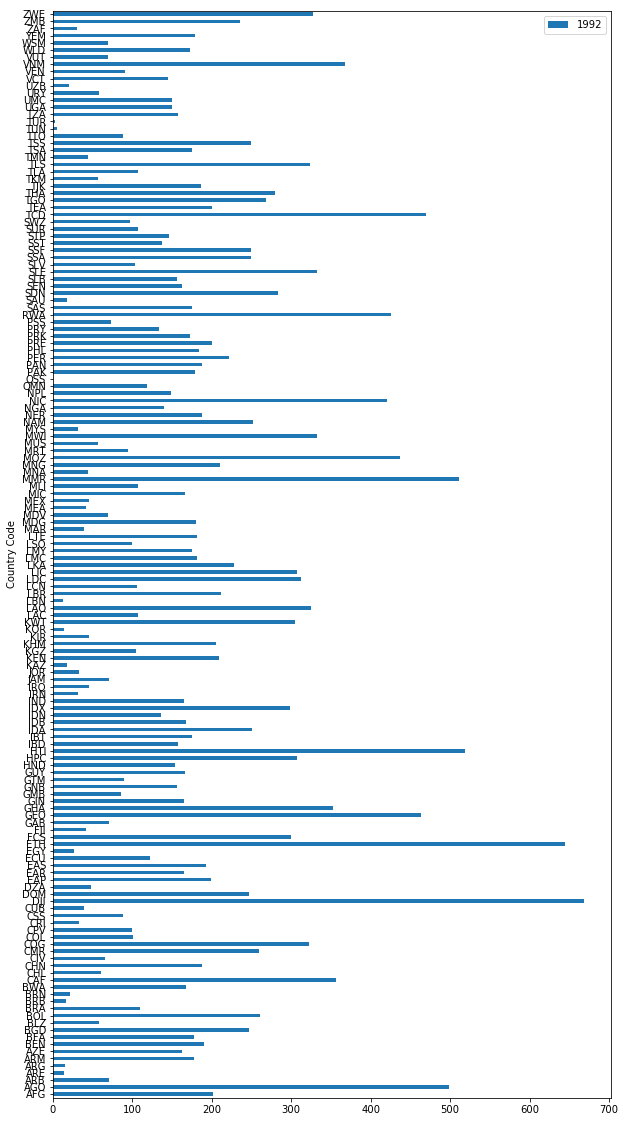

In [10]:
year = input('Enter year to plot: ')
filteredFoodDeficit.plot(kind='barh', x='Country Code', y=str(year), figsize=(10,20))

### I want to be able to easily look at every year for one country. It is easier to do this by setting the index column to name of countries when reading the csv

In [11]:
#Refugee by country of origin (will be used later)
refugeeByCountry = pd.read_csv("../data/ref_by_c_orig/ref_by_c_orig.csv", engine='python', encoding ='latin1',
                               index_col = 'Country Name')
filteredRefugeeByCountry = cleanDataSets(refugeeByCountry)
filteredRefugeeByCountry = filteredRefugeeByCountry.drop('Country Code', axis=1)
#Since food deficit only goes back to 1992, 1990 and 1991 in refugee data set should be dropped
filteredRefugeeByCountry = filteredRefugeeByCountry.drop('1990', axis=1)
filteredRefugeeByCountry = filteredRefugeeByCountry.drop('1991', axis=1)
#Food deficit
foodDeficitByCountry = pd.read_csv("../data/depth_of_the_food_deficit/food_deficit.csv", sep='\t', engine='python', encoding ='latin1',
                         index_col='Country Name')                 
filteredFoodDeficitByCountry = cleanDataSets(foodDeficitByCountry)
filteredFoodDeficitByCountry =filteredFoodDeficitByCountry.drop('Country Code', axis=1)
filteredFoodDeficitByCountry.head()

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,202.000000,249.000000,279.000000,312.000000,329.000000,329.000000,322.000000,312.000000,309.000000,318.000000,...,201.000000,184.00000,168.000000,158.000000,151.00000,149.000000,151.000000,158.000000,166.00000,173.000000
Angola,499.000000,509.000000,510.000000,509.000000,485.000000,457.000000,431.000000,412.000000,394.000000,375.000000,...,209.000000,189.00000,168.000000,149.000000,132.00000,120.000000,111.000000,104.000000,96.00000,90.000000
Arab World,71.079824,73.223515,74.453418,76.527191,75.876617,75.659929,76.360234,76.337497,75.461594,73.620802,...,76.668489,76.02683,75.291664,73.402535,71.54799,55.239727,53.236849,52.198815,51.72893,50.998723
United Arab Emirates,14.000000,13.000000,11.000000,10.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,24.000000,29.00000,33.000000,35.000000,34.00000,33.000000,30.000000,26.000000,22.00000,18.000000
Argentina,15.000000,12.000000,11.000000,9.000000,8.000000,8.000000,8.000000,8.000000,7.000000,6.000000,...,12.000000,11.00000,10.000000,10.000000,10.00000,10.000000,8.000000,6.000000,3.00000,2.000000


#### Plot all years of a country's food deficit based on input
* Take input
* retrieve the row from dataframe
* place the row in the plot
* set axis labels then plot

In [21]:
country = raw_input('Enter country to plot:')
row = filteredFoodDeficitByCountry.loc[country]
ax = row.plot(kind='line', marker='o')
ax.set_xlabel("Year")
ax.set_ylabel("Food Deficit (kilocalories)")
plt.show()

Enter country to plot:North Korea


KeyError: 'the label [North Korea] is not in the [index]'

#### Plot all years of refugees by country of origin based on input
* Take input
* retrieve the row from dataframe
* place the row in the plot
* set axis labels then plot

Enter country to plot:Pakistan


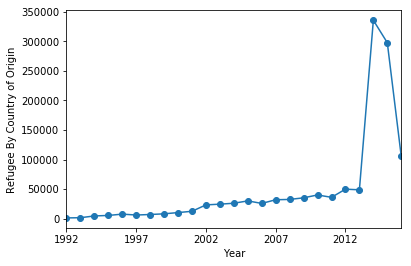

In [13]:
country = raw_input('Enter country to plot:')
row = filteredRefugeeByCountry.loc[country]
ax = row.plot(kind='line', marker='o')
ax.set_xlabel("Year")
ax.set_ylabel("Refugee By Country of Origin")
plt.show()

#### Plotting one country based on input for food deficit and refugees by country of asylum

Enter country to plot:Iraq


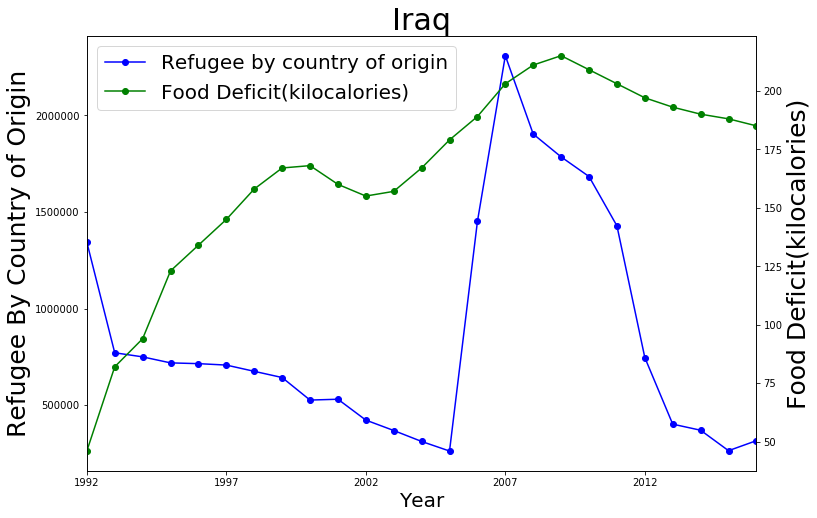

In [32]:
country = raw_input('Enter country to plot:')
refugeeRow = filteredRefugeeByCountry.loc[country]
foodDeficitRow = filteredFoodDeficitByCountry.loc[country]

fig, ax1 = plt.subplots()
fig.set_size_inches(12,8)

blue_line = mlines.Line2D([], [], color='blue', marker='o',
                           label='Refugee by country of origin')

ax1 = refugeeRow.plot(kind='line', marker='o', color = 'b')
ax1.set_xlabel("Year", fontsize=20)
ax1.set_ylabel("Refugee By Country of Origin",  fontsize=25)
ax2 = ax1.twinx()
green_line = mlines.Line2D([], [], color='green', marker='o',
                           label='Food Deficit(kilocalories)')
ax2 = foodDeficitRow.plot(kind='line', marker='o', color = 'g')

ax2.set_ylabel('Food Deficit(kilocalories)',  fontsize=25)
plt.legend(handles=[blue_line, green_line], prop={'size': 20})
plt.title(str(country), fontsize=30)
fig.savefig('FoodDeficitVsRefugeeByOrigin.png')
plt.show()
